In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_vec = np.array([   
    1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980
], dtype=np.double) # unikanie overflow przy interpolacji Lagrange'a
y_vec = np.array([   
    76_212_168,
    92_228_496,
    106_021_537,
    123_202_624,
    132_164_569,
    151_325_798,
    179_323_175,
    203_302_031,
    226_542_199,
], dtype=np.double)
n = len(x_vec)

In [4]:
vander1 = np.array([x**j for x in x_vec for j in reversed(range(n))]).reshape(n, n)
vander2 = np.array([(x - 1900)**j for x in x_vec for j in reversed(range(n))]).reshape(n, n)
vander3 = np.array([(x - 1940)**j for x in x_vec for j in reversed(range(n))]).reshape(n, n)
vander4 = np.array([((x - 1940) / 40)**j for x in x_vec for j in reversed(range(n))]).reshape(n, n)

In [5]:
cond1 = np.linalg.cond(vander1)
cond2 = np.linalg.cond(vander2)
cond3 = np.linalg.cond(vander3)
cond4 = np.linalg.cond(vander4)
print(f"Cond1: {cond1}")
print(f"Cond2: {cond2}")
print(f"Cond3: {cond3}")
print(f"Cond4: {cond4}")

Cond1: 2.7565085275005417e+41
Cond2: 5994335190596687.0
Cond3: 9315536038627.47
Cond4: 1605.4437004786505


In [6]:
vander = vander4
a_vec = np.linalg.solve(vander, y_vec)
print(f"a_vec: {a_vec}")

a_vec: [-3.15180235e+08  1.89175576e+08  6.06291250e+08 -3.42668456e+08
 -3.74614715e+08  1.82527130e+08  1.02716315e+08  4.61307656e+07
  1.32164569e+08]


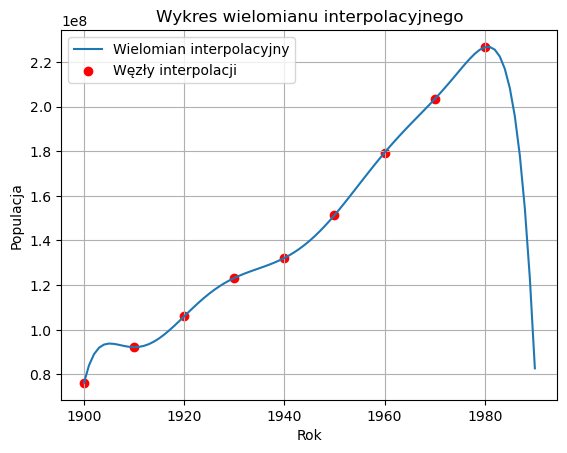

In [7]:
def horner(a_vec, x):
    ret = 0
    for a in a_vec: 
        ret = a + x * ret
    return ret

x_vec_1y = np.arange(1900, 1991, 1)
y_vec_1y = horner(a_vec, np.array([(x - 1940) / 40 for x in x_vec_1y])) 
plt.plot(x_vec_1y, y_vec_1y, label = 'Wielomian interpolacyjny')
plt.scatter(x_vec, y_vec, color = 'red', label = 'Węzły interpolacji')
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.title('Wykres wielomianu interpolacyjnego')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
real_1990 = 248_709_873
extr_1990 = horner(a_vec, (1990 - 1940) / 40)
err = abs(real_1990 - extr_1990)
print(f"Wartość z ekstrapolacji: {extr_1990}")
print(f"Prawdziwa wartość: {real_1990}")
print(f"Błąd względny: {err / real_1990}")

Wartość z ekstrapolacji: 82749140.99999541
Prawdziwa wartość: 248709873
Błąd względny: 0.6672864651416737


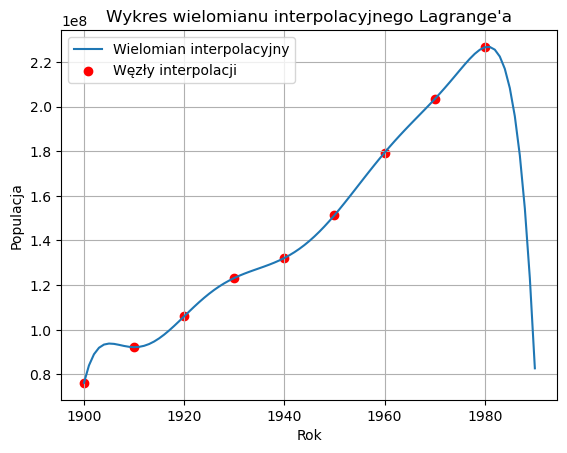

In [9]:
y_vec_1y_lagrange = np.zeros(len(x_vec_1y)) 
den = np.zeros(n)

for i in range(n):
    den[i] = np.prod(x_vec[:i] - x_vec[i]) * np.prod(x_vec[i + 1:] - x_vec[i])

for i in range(n):
    term = y_vec[i]
    for j in range(n):
        if j != i:
            term *= (x_vec_1y - x_vec[j])
    y_vec_1y_lagrange += term / den[i]

plt.plot(x_vec_1y, y_vec_1y_lagrange, label = 'Wielomian interpolacyjny')
plt.scatter(x_vec, y_vec, color = 'red', label = 'Węzły interpolacji')
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.title("Wykres wielomianu interpolacyjnego Lagrange'a")
plt.legend()
plt.grid(True)
plt.show()

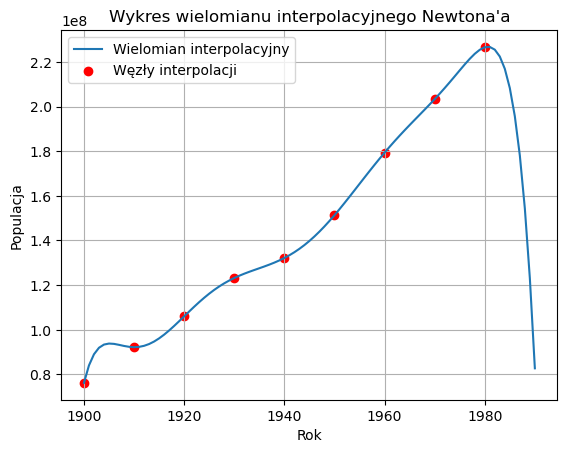

In [10]:
a_vec_newton = np.array(y_vec, copy = True, dtype = np.double)

for i in range(1, n):
    a_vec_newton[i:n] = (a_vec_newton[i:n] - a_vec_newton[i - 1]) / (x_vec[i:n] - x_vec[i - 1])

p_vec_newton = np.ones(shape = (n, len(x_vec_1y)))

for i in range(1, n):
    for j in range(i):
        p_vec_newton[i] *= (x_vec_1y - x_vec[j])

y_vec_1y_newton = np.dot(a_vec_newton, p_vec_newton)

plt.plot(x_vec_1y, y_vec_1y_newton, label = 'Wielomian interpolacyjny')
plt.scatter(x_vec, y_vec, color = 'red', label = 'Węzły interpolacji')
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.title("Wykres wielomianu interpolacyjnego Newtona'a")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
rounded_y = np.around(y_vec, -6)
print(f"Zaokrąglone wartości y: {rounded_y}")

Zaokrąglone wartości y: [7.60e+07 9.20e+07 1.06e+08 1.23e+08 1.32e+08 1.51e+08 1.79e+08 2.03e+08
 2.27e+08]


In [21]:
a_vec_rounded = np.linalg.solve(vander, rounded_y)
print(f"a_vec_rounded: {a_vec_rounded}")

a_vec_rounded: [-2.94196825e+08  1.86920635e+08  5.70311111e+08 -3.38488889e+08
 -3.56755556e+08  1.81111111e+08  1.00141270e+08  4.59571429e+07
  1.32000000e+08]


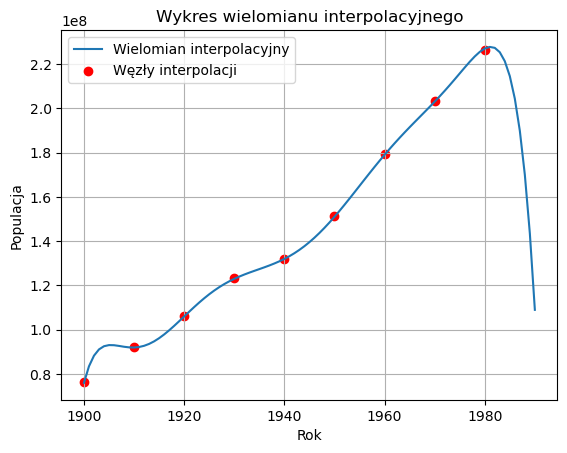

In [20]:
y_vec_1y_rounded = horner(a_vec_rounded, np.array([(x - 1940) / 40 for x in x_vec_1y])) 
plt.plot(x_vec_1y, y_vec_1y_rounded, label = 'Wielomian interpolacyjny')
plt.scatter(x_vec, y_vec, color = 'red', label = 'Węzły interpolacji')
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.title('Wykres wielomianu interpolacyjnego')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
real_1990_rounded = 248_709_873
extr_1990_rounded = horner(a_vec_rounded, (1990 - 1940) / 40)
err_rounded = abs(real_1990_rounded - extr_1990_rounded)
print(f"Wartość z ekstrapolacji: {extr_1990_rounded}")
print(f"Prawdziwa wartość: {real_1990_rounded}")
print(f"Błąd względny: {err_rounded / real_1990_rounded}")

Wartość z ekstrapolacji: 108999999.99999957
Prawdziwa wartość: 248709873
Błąd względny: 0.5617383472348138
